In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## the deep learning model start


1. data into tensors
2. pytorch model
3. make predictions
4. evaluate the model
5. improve through experimentation
6. save and reload the model

### !. Data ( getting and cleaning the data )

* can have structued , unstructured data , semi strucutred data




In [ ]:
#creating data

weight = 0.7
bias = 0.5


start = 0
end = 1
step =0.03
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X +bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.5000],
         [0.5210],
         [0.5420],
         [0.5630],
         [0.5840],
         [0.6050],
         [0.6260],
         [0.6470],
         [0.6680],
         [0.6890]]))

In [ ]:
###divding the data into train and test set

In [ ]:
train_split = int(0.8* len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(27, 27, 7, 1)

In [ ]:
### creating visualization to see our training data

In [ ]:
def plot_prediction(train_data = X_train,
                    train_label = Y_train,
                    test_label = Y_test,
                    test_data = X_test,
                    prediction = None):

 plt.figure(figsize=(10,7))

 plt.scatter(train_data,train_label, c="b", s=4 , label="training data")

 plt.scatter(test_data,test_label,c="g" ,s=4 ,label="testing data")

 if prediction is not None :
  plt.scatter(test_data,predictions,c="r",s=4,label="predictions")


 plt.legend(prop={"size":14});


ValueError: x and y must be the same size

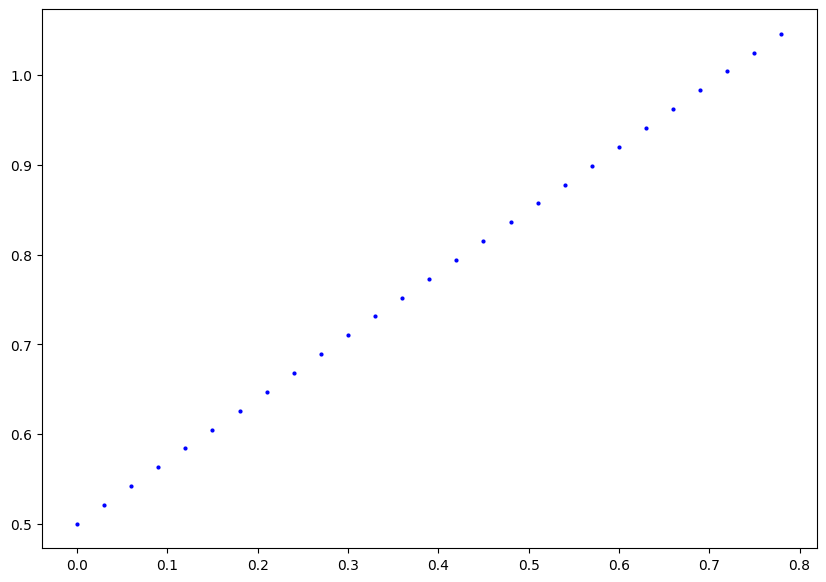

In [ ]:
plot_prediction();


In [ ]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(40)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([-0.3482]))])

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 7
Number of predictions made: 7
Predicted values:
tensor([[0.4057],
        [0.4336],
        [0.4616],
        [0.4895],
        [0.5174],
        [0.5453],
        [0.5732]])


ValueError: x and y must be the same size

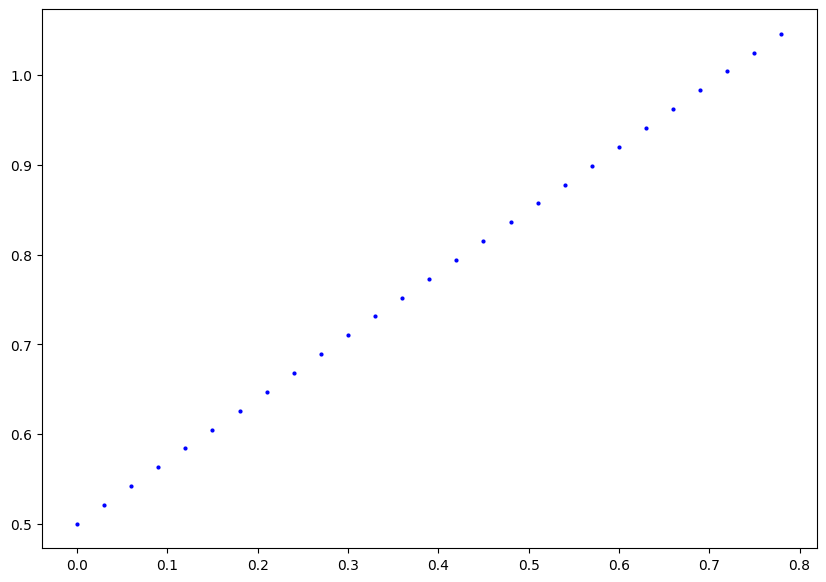

In [ ]:
plot_prediction(prediction=y_preds)

In [ ]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(40)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, Y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.7581925988197327 | MAE Test Loss: 0.5640183687210083 
Epoch: 10 | MAE Train Loss: 0.6429827213287354 | MAE Test Loss: 0.42891860008239746 
Epoch: 20 | MAE Train Loss: 0.5277726054191589 | MAE Test Loss: 0.29381847381591797 
Epoch: 30 | MAE Train Loss: 0.41256242990493774 | MAE Test Loss: 0.15871798992156982 
Epoch: 40 | MAE Train Loss: 0.29735228419303894 | MAE Test Loss: 0.05946272611618042 
Epoch: 50 | MAE Train Loss: 0.18214207887649536 | MAE Test Loss: 0.11148292571306229 
Epoch: 60 | MAE Train Loss: 0.11583231389522552 | MAE Test Loss: 0.20251627266407013 
Epoch: 70 | MAE Train Loss: 0.09870527684688568 | MAE Test Loss: 0.24019555747509003 
Epoch: 80 | MAE Train Loss: 0.09204673767089844 | MAE Test Loss: 0.25291797518730164 
Epoch: 90 | MAE Train Loss: 0.08755336701869965 | MAE Test Loss: 0.25617358088493347 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


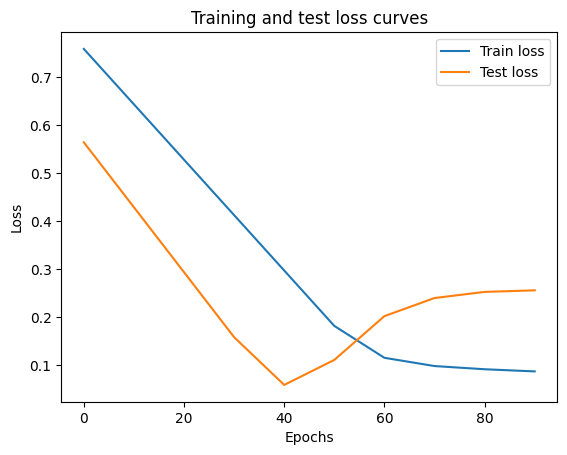

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([1.1092])), ('bias', tensor([0.3222]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.5


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.2207],
        [1.2539],
        [1.2872],
        [1.3205],
        [1.3538],
        [1.3870],
        [1.4203]])

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01.pth


In [ ]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
import torch
import torch.nn
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data = X_train,
                    train_label = Y_train,
                    test_label = Y_test,
                    test_data = X_test,
                    prediction = None):

 plt.figure(figsize=(10,7))

 plt.scatter(train_data,train_label, c="b", s=4 , label="training data")

 plt.scatter(test_data,test_label,c="g" ,s=4 ,label="testing data")

 if prediction is not None :
  plt.scatter(test_data,predictions,c="r",s=4,label="predictions")


 plt.legend(prop={"size":14});


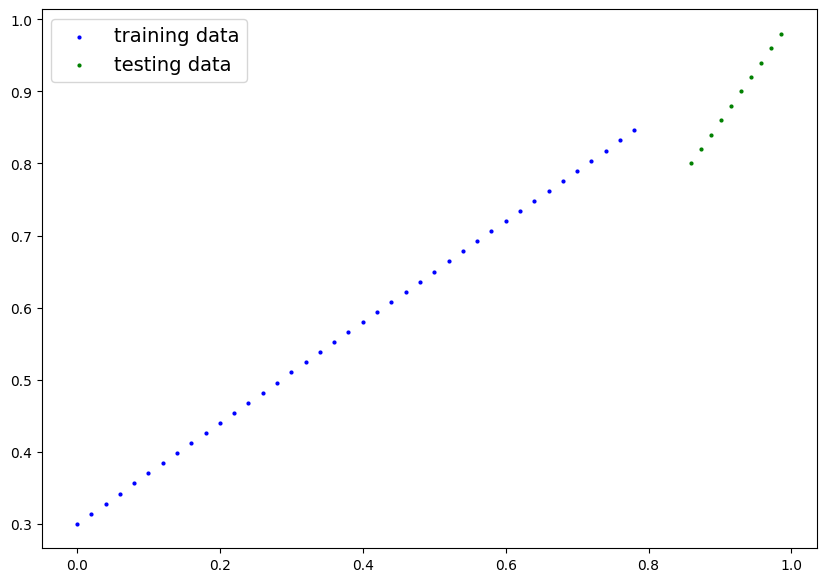

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

NameError: name 'device' is not defined